In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('F:\\DataSets\\Twitter\\train_E6oV3lV.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
train.shape

(31962, 4)

In [6]:
train.head()

,id,label,tweet,word_count
0,1,0,@user when a father is dysfunctional and is s...,18
1,2,0,@user @user thanks for #lyft credit i can't us...,19
2,3,0,bihday your majesty,3
3,4,0,#model i love u take with u all the time in ...,14
4,5,0,factsguide: society now #motivation,4


In [7]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

<h2>Under-Sampling</h2>

In [10]:
count_class_0, count_class_1 = train.label.value_counts()

# Divide by class
df_class_0 = train[train['label'] == 0]
df_class_1 = train[train['label'] == 1]

In [14]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [15]:
df_test_under.shape

(4484, 4)

In [23]:
print(df_test_under.label.value_counts())

1    2242
0    2242
Name: label, dtype: int64


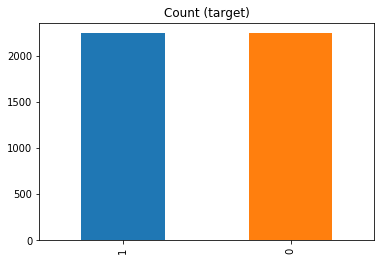

In [22]:
df_test_under.label.value_counts().plot(kind='bar', title='Count (target)');

<h2>Over-Sampling</h2>

In [25]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)

In [26]:
df_class_1_over.shape

(29720, 4)

In [27]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [29]:
print('Random over-sampling:')
print(df_test_over.label.value_counts())

Random over-sampling:
1    29720
0    29720
Name: label, dtype: int64


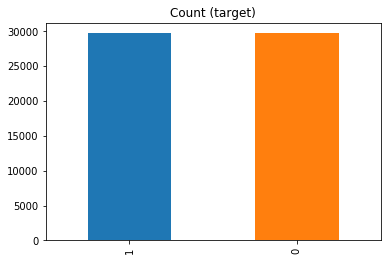

In [31]:
df_test_over.label.value_counts().plot(kind='bar', title='Count (target)')

In [33]:
df_test_over.shape

(59440, 4)

In [39]:
df_test_over['word_count'] = df_test_over['tweet'].apply(lambda x: len(str(x).split()))

In [40]:
def avg_word(sent):
    words = sent.split()
    total_len = len(words)
    return (sum(len(word) for word in words)/total_len)

In [41]:
df_test_over['avr_word'] = df_test_over['tweet'].apply(lambda x: avg_word(x))

In [42]:
df_test_over.head()

,id,label,tweet,word_count,avr_word
0,1,0,@user when a father is dysfunctional and is s...,18,4.555556
1,2,0,@user @user thanks for #lyft credit i can't us...,19,5.315789
2,3,0,bihday your majesty,3,5.666667
3,4,0,#model i love u take with u all the time in ...,14,4.928571
4,5,0,factsguide: society now #motivation,4,8.000000


<h2>Remove Non ASCII values</h2>

In [43]:
def strip_non_ascii(stri):
    stripped = (c for c in stri if 0 <ord(c)<128)
    return ''.join(stripped)

In [44]:
df_test_over['tweet'] = df_test_over['tweet'].apply(lambda x: strip_non_ascii(x))

<h2>Stop Words</h2>

In [45]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [47]:
df_test_over['stopwords'] = df_test_over['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))

In [49]:
df_test_over.head()

,id,label,tweet,word_count,avr_word,stopwords
0,1,0,@user when a father is dysfunctional and is s...,18,4.555556,10
1,2,0,@user @user thanks for #lyft credit i can't us...,19,5.315789,5
2,3,0,bihday your majesty,3,5.666667,1
3,4,0,#model i love u take with u all the time in ...,14,4.928571,5
4,5,0,factsguide: society now #motivation,4,8.000000,1


<h2>Hash Tags</h2>

In [50]:
df_test_over['hashtags'] = df_test_over['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df_test_over.head()

,id,label,tweet,word_count,avr_word,stopwords,hashtags
0,1,0,@user when a father is dysfunctional and is s...,18,4.555556,10,1
1,2,0,@user @user thanks for #lyft credit i can't us...,19,5.315789,5,3
2,3,0,bihday your majesty,3,5.666667,1,0
3,4,0,#model i love u take with u all the time in ...,14,4.928571,5,1
4,5,0,factsguide: society now #motivation,4,8.000000,1,1


<h2>Preprocessing</h2>

<p><b>Convert every thing in Lower Case<p>

In [51]:
df_test_over['tweet'] = df_test_over['tweet'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
df_test_over.head()

,id,label,tweet,word_count,avr_word,stopwords,hashtags
0,1,0,@user when a father is dysfunctional and is so...,18,4.555556,10,1
1,2,0,@user @user thanks for #lyft credit i can't us...,19,5.315789,5,3
2,3,0,bihday your majesty,3,5.666667,1,0
3,4,0,#model i love u take with u all the time in ur!!!,14,4.928571,5,1
4,5,0,factsguide: society now #motivation,4,8.000000,1,1


In [52]:
df_test_over['tweet'] = df_test_over['tweet'].str.replace('[^\w\s]', '')
df_test_over.head()

,id,label,tweet,word_count,avr_word,stopwords,hashtags
0,1,0,user when a father is dysfunctional and is so ...,18,4.555556,10,1
1,2,0,user user thanks for lyft credit i cant use ca...,19,5.315789,5,3
2,3,0,bihday your majesty,3,5.666667,1,0
3,4,0,model i love u take with u all the time in ur,14,4.928571,5,1
4,5,0,factsguide society now motivation,4,8.000000,1,1


<h2>Removing Stop words</h2>

In [53]:
df_test_over['tweet'] = df_test_over['tweet'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))
df_test_over.head()

,id,label,tweet,word_count,avr_word,stopwords,hashtags
0,1,0,user father dysfunctional selfish drags kids d...,18,4.555556,10,1
1,2,0,user user thanks lyft credit cant use cause do...,19,5.315789,5,3
2,3,0,bihday majesty,3,5.666667,1,0
3,4,0,model love u take u time ur,14,4.928571,5,1
4,5,0,factsguide society motivation,4,8.000000,1,1


In [54]:
freq = pd.Series(' '.join(df_test_over['tweet']).split()).value_counts()[:10]
freq

user       40213
amp         5112
love        3072
trump       2798
like        2707
day         2334
libtard     2014
people      2008
happy       1847
new         1834
dtype: int64

In [55]:
freq = list(freq.index)
df_test_over['tweet'] = df_test_over['tweet'].apply(lambda x: ' '.join(x for x in x.split() if x not in freq))

In [56]:
freq = pd.Series(' '.join(df_test_over['tweet']).split()).value_counts()[-20:]
freq

bandvaulttv      1
oholy            1
inefficient      1
danceworldcup    1
christopher      1
mailboxes        1
needless         1
iqbals           1
amptired         1
playablanca      1
meyerland        1
echeveria        1
hoho             1
apulia           1
ruining          1
snapchatstory    1
clashroyale      1
366              1
darkandstormy    1
cabo             1
dtype: int64

In [57]:
freq = list(freq.index)
df_test_over['tweet'] = df_test_over['tweet'].apply(lambda x: ' '.join(x for x in x.split() if x not in freq))

In [58]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df_test_over['tweet'][:10].apply(lambda x: ' '.join([st.stem(word) for word in x.split()]))

0        father dysfunct selfish drag kid dysfunct run
1    thank lyft credit cant use caus dont offer whe...
2                                       bihday majesti
3                               model u take u time ur
4                              factsguid societi motiv
5    22 huge fan fare big talk leav chao pay disput...
6                                  camp tomorrow danni
7    next school year year exam cant think school e...
8    land allin cav champion cleveland clevelandcavali
9                                        welcom im gr8
Name: tweet, dtype: object

In [59]:
from textblob import TextBlob

<p><b>Uni-gram or Bag of Words</p>

In [60]:
TextBlob(df_test_over['tweet'][0]).ngrams(1)

[WordList(['father']),
 WordList(['dysfunctional']),
 WordList(['selfish']),
 WordList(['drags']),
 WordList(['kids']),
 WordList(['dysfunction']),
 WordList(['run'])]

<p><b>Bi-gram</p>

In [61]:
TextBlob(train['tweet'][0]).ngrams(2)

[WordList(['user', 'when']),
 WordList(['when', 'a']),
 WordList(['a', 'father']),
 WordList(['father', 'is']),
 WordList(['is', 'dysfunctional']),
 WordList(['dysfunctional', 'and']),
 WordList(['and', 'is']),
 WordList(['is', 'so']),
 WordList(['so', 'selfish']),
 WordList(['selfish', 'he']),
 WordList(['he', 'drags']),
 WordList(['drags', 'his']),
 WordList(['his', 'kids']),
 WordList(['kids', 'into']),
 WordList(['into', 'his']),
 WordList(['his', 'dysfunction']),
 WordList(['dysfunction', 'run'])]

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [63]:
matrix = TfidfVectorizer(max_features=2000, analyzer='word', ngram_range=(1,1))

In [64]:
data = df_test_over['tweet']

In [65]:
X = matrix.fit_transform(data).toarray()
y = df_test_over['label']

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [82]:
X_train.shape

(44580, 2000)

In [83]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix

confusion_matrix(y_test, y_pred)

array([[6613,  856],
       [ 678, 6713]], dtype=int64)

In [85]:
accuracy_score(y_test, y_pred)

0.89676985195154779

In [86]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [87]:
accuracy_score(y_test, y_pred)

0.98297442799461643

In [88]:
confusion_matrix(y_test, y_pred)

array([[7278,  191],
       [  62, 7329]], dtype=int64)

In [89]:
prec = 7329/(7329+191)

In [90]:
rec = 7329/(7329+62)

In [91]:
(2*prec*rec)/(rec+prec)

0.9830326604520153